In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read(name):
    buff = None
    with open(name, 'r') as f:
        buff = f.read()

    return json.loads(buff)

In [ ]:
text_res = read('/content/drive/MyDrive/katia/model_text.json')
title_res = read('/content/drive/MyDrive/katia/model_title.json')

In [ ]:
def set_axis(ax):
    ax.set_axisbelow(True)
    ax.grid()
    ax.legend()

## Results

Plots for training data

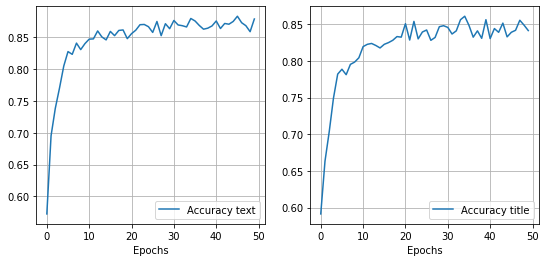

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 4))

ax1.plot(text_res['accuracy'], label='Accuracy text')
ax1.set_xlabel('Epochs')
set_axis(ax1)

ax2.plot(title_res['accuracy'], label='Accuracy title')
ax2.set_xlabel('Epochs')
set_axis(ax2)

## Analysis

In [ ]:
df_clean=pd.read_csv('/content/drive/MyDrive/katia/clean_data.csv', sep='\t')
df_clean

,Unnamed: 0,title,text,subject,date,label
0,18543,bill bennett rip never trumpersthe voice reaso...,bill bennett voice reason conservative incredi...,politics,2016-08-20,1
1,6636,trump taking credit inaugural singer album sal...,inauguration fast approaching donald trump try...,News,2017-01-04,1
2,6762,lol cnn host lemon tell viewer insult intellig...,laughable news network america proved unreliab...,left-news,2017-04-04,1
3,10264,mansion obama stay havana built impress,havana reuters mansion havana u president bara...,politicsNews,2016-03-18,0
4,1842,la father kill son gay video,le two week father used shotgun end life amir ...,News,2016-04-03,1
...,...,...,...,...,...,...
44862,19723,trump speak tough term north korea first un sp...,new york reuters president donald trump speak ...,worldnews,2017-09-19,0
44863,16568,particular order sarah palin us random word pr...,much may want sarah palin drift obscurity know...,News,2016-06-27,1
44864,3428,u house vote republican doddfrank reform bill ...,reuters u house representative vote broad bill...,politicsNews,2017-06-02,0
44865,1690,breaking fl voter fraud alert ten thousand mai...,httpstwittercomten_gopstatus793890171058085888...,left-news,2016-11-02,1


In [ ]:
true_n = ' '.join(df_clean[df_clean['label']=='0']['text'])
fake_n = ' '.join(df_clean[df_clean['label']=='1']['text'])

In [ ]:
def plot_top_ngrams(corpus, title, ylabel, col, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color=col, width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

In [ ]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram",'green', n=2)

In [ ]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram",'red', n=2)